## Ejercitacion 1.
### Leo Mansini LU 318/19. 
Laboratorio de datos. 1° cuatrimestre 2021.

Importo las librerías que voy a usar.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10) # Para ver mas en el notebook cuando imprimo dataframes
pd.options.mode.chained_assignment = None # Warnings que no correspondían para lo que hacía
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
# path OCEAN
filename = './data/ocean_safe.csv' 
ocean_data = pd.read_csv(filename)
# path Coronadelicos
filename = './data/coronadelicos_safe.csv' 
coronadelicos_data = pd.read_csv(filename)

Uno los dataframes y veo como se cargo.

In [ ]:
data = pd.merge(ocean_data, coronadelicos_data, how = "inner", on = 'hash')
data

,0_1,0_2,0_3,0_4,0_5,...,12_encuentro_salida_en_situacion_dificil,12_tengo_energia_para_lo_que_tengo_que_hacer,12_siento_comodo_si_hay_gente_a_la_que_no_le_agrado,13_login_disclaimer_fork,timestamp_y
0,4,5,5,1,5,...,6,7,6,2,10/4/2020 20:43:47
1,4,3,5,3,4,...,5,4,6,2,10/5/2020 13:23:33
2,5,5,5,3,3,...,6,4,6,2,14/4/2020 15:39:08
3,4,4,5,4,4,...,6,3,2,2,25/5/2020 16:19:54
4,5,3,2,2,5,...,6,5,7,2,11/4/2020 13:21:43
...,...,...,...,...,...,...,...,...,...,...,...
8231,5,5,2,5,5,...,3,4,1,2,23/3/2021 20:02:22
8232,5,4,4,3,4,...,5,5,1,2,24/3/2021 19:00:11
8233,3,1,3,4,3,...,4,4,1,2,24/3/2021 23:18:10
8234,4,4,2,4,2,...,7,2,5,2,25/3/2021 12:08:05


Separo las personas que fumaron alguna vez marihuana, las que nunca fumaron, y aquellos que han consumido antidepresivos o antipsicoticos.

In [ ]:
# -999 = nunca consumió

df_marihuanaSi = data[data["7_marihuana"] != -999]
 
df_marihuanaNo = data[data["7_marihuana"] == -999]
 
quimicos_index = (data["7_sedativos"] != -999) | (data["7_antidepresivos o antipsicoticos"] != -999)
df_quimicos = data[quimicos_index]
df_quimicos

,0_1,0_2,0_3,0_4,0_5,...,12_encuentro_salida_en_situacion_dificil,12_tengo_energia_para_lo_que_tengo_que_hacer,12_siento_comodo_si_hay_gente_a_la_que_no_le_agrado,13_login_disclaimer_fork,timestamp_y
0,4,5,5,1,5,...,6,7,6,2,10/4/2020 20:43:47
3,4,4,5,4,4,...,6,3,2,2,25/5/2020 16:19:54
9,5,4,4,2,2,...,6,6,3,2,6/5/2020 21:37:08
12,4,4,2,5,3,...,3,1,4,2,14/4/2020 13:17:37
16,4,4,2,4,4,...,4,4,4,2,14/5/2020 22:21:36
...,...,...,...,...,...,...,...,...,...,...,...
8226,5,2,2,3,4,...,7,5,1,2,1/3/2021 8:58:17
8227,3,2,3,1,4,...,5,6,4,2,7/3/2021 1:57:40
8228,5,2,4,3,5,...,5,3,1,2,10/3/2021 12:29:56
8232,5,4,4,3,4,...,5,5,1,2,24/3/2021 19:00:11


Extraigo las columnas con las 5 dimensiones de la personalidad de los tres datasets, y armo otro dataframe con los promedios de esas columnas para cada grupo que separé antes. También, normalizo esos promedios dividiendo por el máximo de cada columna.

In [ ]:
dimensiones = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness']
diccionario = {}
for dim in dimensiones:
  promedios = []
  for df in [df_marihuanaNo, df_marihuanaSi, df_quimicos]:
    prom = df[dim].mean()
    promedios.append(prom)
  diccionario[dim] = promedios

grupos = ["Nunca fumaron", "Han fumado", "Drogas de prescripción"]
dimensiones_label = ["extraversión", "amabilidad", "responsabilidad", "neuroticismo", "apertura"]

colores = sbn.color_palette()[:3]
colores_dict = dict(zip(grupos, colores)) # así uso los mismos colores todo el notebook
 
df_dimensiones = pd.DataFrame(diccionario, index = grupos)
df_dimensiones_norm = (df_dimensiones)/(df_dimensiones.max().max())
print(df_dimensiones_norm)
print(df_dimensiones)

                        1_extraversion  1_agreeableness  1_conscientiousness  \
Nunca fumaron                 0.650622         0.838030             0.791428   
Han fumado                    0.658511         0.829971             0.746559   
Drogas de prescripción        0.650866         0.820219             0.738431   

                        1_neuroticism  1_openness  
Nunca fumaron                0.658164    0.965847  
Han fumado                   0.663035    0.991568  
Drogas de prescripción       0.719944    1.000000  
                        1_extraversion  1_agreeableness  1_conscientiousness  \
Nunca fumaron                25.536346        32.891945            31.062868   
Han fumado                   25.846005        32.575646            29.301814   
Drogas de prescripción       25.545924        32.192882            28.982778   

                        1_neuroticism  1_openness  
Nunca fumaron               25.832351   37.908644  
Han fumado                  26.023543   38.918

In [ ]:
def radar_plot(df, title = "",):
  dimensiones = df.columns
  angulos = [n/float(5) * 2 * np.pi for n in range(5)]
  angulos += angulos[:1]
 
  fig, ax = plt.subplots(figsize = (6,6), subplot_kw = {'projection': 'polar'})
  
  ax.set_theta_offset(np.pi / 2)
  ax.set_theta_direction(-1)
 
  ax.set_xticks(angulos)
  ax.set_xticklabels(dimensiones_label, fontsize = 12)
 
  ax.set_rlabel_position(0)
  #yticks = [np.around(0.9+float(i)/100, decimals = 2) for i in range(1, 11)] # ajustado a mi ylim de (0.9, 1)
  yticks = np.arange(0, 1, 0.1)
  ax.set_yticks(yticks)
  ax.set_yticklabels(yticks, 
                      color = 'darkgrey',
                      size = 7)
  #ax.set_ylim(0.9, 1)
  ax.set_ylim(0, 1)


  for encuestado in df.iloc:
    valores = encuestado.values.flatten().tolist()
    valores += valores[:1]
    ax.plot(angulos, valores, linewidth=1.5, linestyle = 'solid', label = encuestado.name, color = colores_dict[encuestado.name])
                                                                  # cambio label y uso mi diccionario para los colores
    ax.fill(angulos, valores, 'b', alpha=0.1)
  ax.legend(loc=(-0.2,-0.3),fontsize=12)
  ax.set_title(title, position=(.5, 1.2),fontsize=15)

Grafico en un radar plot esos promedios normalizados coloreados por grupo.

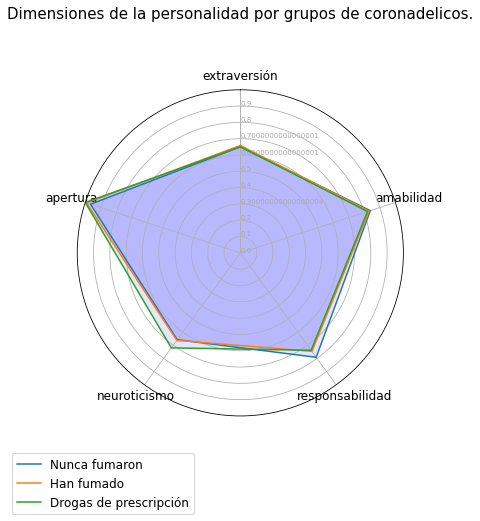

In [ ]:
radar_plot(df_dimensiones_norm, title= "Dimensiones de la personalidad por grupos de coronadelicos.") # y_axis = [0.9, 1]

Veo diferencias en dimensiones de la personalidad para cada grupo, voy a comparar en un histograma la dimension de neuroticismo para los grupos "Drogas de prescripción" y "Han fumado", y la dimension de responsabilidad para los grupos "Han fumado" y "Nunca fumaron".

In [ ]:
j = 0
for i in [df_marihuanaNo, df_marihuanaSi, df_quimicos]:
  i["grupo"] = grupos[j]
  j+=1

comp_responsabilidad = df_marihuanaNo.append(df_marihuanaSi)[["1_conscientiousness", "grupo"]] # me quedo solo con las columnas "grupo", y la dimension a comparar
#comp_responsabilidad["1_conscientiousness"] = comp_responsabilidad["1_conscientiousness"]/comp_responsabilidad["1_conscientiousness"].max()
comp_neuroticismo = df_marihuanaSi.append(df_quimicos)[["1_neuroticism", "grupo"]]
#comp_neuroticismo["1_neuroticism"] = comp_neuroticismo["1_neuroticism"]/comp_neuroticismo["1_neuroticism"].max()
comp_neuroticismo

,1_neuroticism,grupo
0,8,Han fumado
2,30,Han fumado
4,31,Han fumado
5,26,Han fumado
6,24,Han fumado
...,...,...
8226,35,Drogas de prescripción
8227,22,Drogas de prescripción
8228,27,Drogas de prescripción
8232,31,Drogas de prescripción


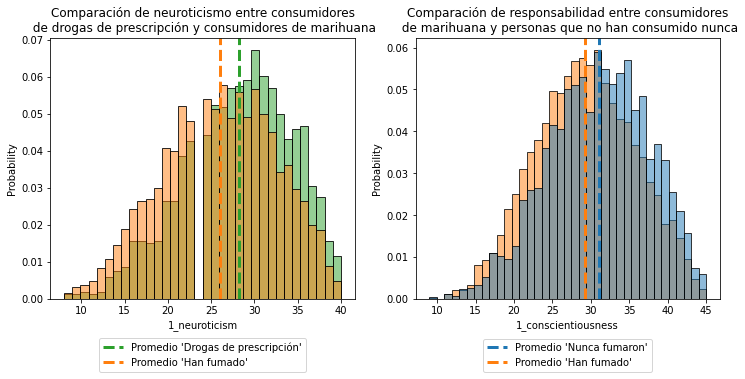

In [ ]:

fig, ax = plt.subplots(1, 2, figsize = (12, 4.8))
sbn.histplot(comp_neuroticismo, x = "1_neuroticism", hue = "grupo", stat = "probability", ax = ax[0], palette = colores_dict, common_norm = False)
ax[0].set_title("Comparación de neuroticismo entre consumidores\n de drogas de prescripción y consumidores de marihuana")
prom_n_msi = comp_neuroticismo[comp_neuroticismo["grupo"] == "Han fumado"]["1_neuroticism"].mean()
prom_n_qui = comp_neuroticismo[comp_neuroticismo["grupo"] == "Drogas de prescripción"]["1_neuroticism"].mean()
ax[0].axvline(prom_n_qui, 0, 1, lw = 3, ls = "--", color = colores_dict["Drogas de prescripción"], label = "Promedio 'Drogas de prescripción'")
ax[0].axvline(prom_n_msi, 0, 1, lw = 3, ls = "--",  color = colores_dict["Han fumado"], label = "Promedio 'Han fumado'")
ax[0].legend(bbox_to_anchor=(0.5, -0.3), loc="lower center")

sbn.histplot(comp_responsabilidad, x = "1_conscientiousness", hue = "grupo", stat = "probability", ax = ax[1], palette = colores_dict, common_norm = False)
ax[1].set_title("Comparación de responsabilidad entre consumidores\n de marihuana y personas que no han consumido nunca")
prom_c_mno = comp_responsabilidad[comp_responsabilidad["grupo"] == "Nunca fumaron"]["1_conscientiousness"].mean()
prom_c_msi = comp_responsabilidad[comp_responsabilidad["grupo"] == "Han fumado"]["1_conscientiousness"].mean()
ax[1].axvline(prom_c_mno, 0, 1, lw = 3, ls = "--", color = colores_dict["Nunca fumaron"], label = "Promedio 'Nunca fumaron'")
ax[1].axvline(prom_c_msi, 0, 1, lw = 3, ls = "--", color = colores_dict["Han fumado"], label = "Promedio 'Han fumado'")
ax[1].legend(bbox_to_anchor=(0.5, -0.3), loc="lower center")

In [ ]:
sd_n_msi = comp_neuroticismo[comp_neuroticismo["grupo"] == "Han fumado"]["1_neuroticism"].std()
sd_n_qui = comp_neuroticismo[comp_neuroticismo["grupo"] == "Drogas de prescripción"]["1_neuroticism"].std()

sd_c_msi = comp_responsabilidad[comp_responsabilidad["grupo"] == "Han fumado"]["1_conscientiousness"].std()
sd_c_mno = comp_responsabilidad[comp_responsabilidad["grupo"] == "Nunca fumaron"]["1_conscientiousness"].std()


d_cohen_n = (prom_n_msi - prom_n_qui)/np.sqrt((sd_n_msi**2 + sd_n_qui**2)/2)
d_cohen_c = (prom_c_msi - prom_c_mno)/np.sqrt((sd_c_msi**2 + sd_c_mno**2)/2)

print(abs(d_cohen_n), abs(d_cohen_c))
print(sd_n_msi, sd_n_qui, prom_n_msi, prom_n_qui)

0.34761850957561163 0.2654491546719551
6.627618626079108 6.216872472060101 26.02354303357777 28.257175660160733


La D de Cohen entre las mediciones de neuroticismo entre los que han fumado marihuana y los que han consumido drogas de prescripción es de 0.348.

La D de Cohen entre las mediciones de responsabilidad entre los que nunca han fumado marihuana y los que han fumado es de 0.265.

Siguiendo el criterio de la D de Cohen, hay un efecto de magnitud pequeña en las mediciones de responsabilidad si la persona fumo o no marihuana, y hay otro efecto, entre pequeño y mediano, en las mediciones de neurocitismo, según se mida a las personas que consumieron drogas de prescripción o las que han fumado marihuana